In [1]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_ollama import ChatOllama
from langchain_huggingface import HuggingFaceEmbeddings  # HuggingFace嵌入

load_dotenv("../.env")

model = ChatOpenAI(
                    temperature=0,
                    max_tokens=4096,
                    presence_penalty=1.2,
                    # model='deepseek-chat',
                    # openai_api_key=os.getenv('DEEPSEEK_API_KEY'),
                    # openai_api_base="https://api.deepseek.com/v1",
                    model='gpt-4o-mini',
                    openai_api_key=os.getenv('CLOSEAI_API_KEY'),
                    openai_api_base="https://api.openai-proxy.org/v1",
                )

# model = ChatOllama(
#                     temperature=0,
#                     num_predict=4096,
#                     repeat_penalty=1.2,
#                     model="llama3.2:3b"
#                 )

embedding = HuggingFaceEmbeddings(
            model_name="../../../../Embedding/maidalun/bce-embedding-base_v1",
            model_kwargs={"device": "cuda",
                          "trust_remote_code": True},
            encode_kwargs={"normalize_embeddings": True},
        )

c:\Users\farben\anaconda3\envs\lclg\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Define graph

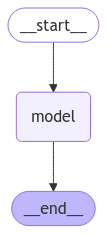

In [3]:
import operator
from typing import Annotated, Sequence
from typing_extensions import TypedDict


from langchain_core.messages import BaseMessage, HumanMessage

from langgraph.graph import END, StateGraph, START



class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]


def _call_model(state):
    state["messages"]
    response = model.invoke(state["messages"])
    return {"messages": [response]}


# Define a new graph
builder = StateGraph(AgentState)
builder.add_node("model", _call_model)
builder.add_edge(START, "model")
builder.add_edge("model", END)

graph = builder.compile()

graph

# Configure the graph

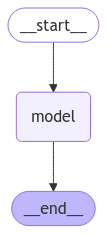

In [4]:
from langchain_openai import ChatOpenAI
from typing import Optional
from langchain_core.runnables.config import RunnableConfig

openai_model = ChatOpenAI()

models = {
    "anthropic": model,
    "openai": openai_model,
}


def _call_model(state: AgentState, config: RunnableConfig):
    # Access the config through the configurable key
    model_name = config["configurable"].get("model", "anthropic")
    model = models[model_name]
    response = model.invoke(state["messages"])
    return {"messages": [response]}


# Define a new graph
builder = StateGraph(AgentState)
builder.add_node("model", _call_model)
builder.add_edge(START, "model")
builder.add_edge("model", END)

graph = builder.compile()

graph